# THIS IS DIABETES PRICTION SOLUTION
IMPORT DIFFERENT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA TABLE

In [4]:
df = pd.read_csv('DIABETES-DATA.csv')

In [5]:
df.shape

(768, 10)

In [6]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


DUPLICATE VALUE TREATMENT

In [7]:
df.duplicated().sum()

0

NULL VALUE TREATMENT

In [8]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

REPLACEMENT OF  BOOLEAN VALUE TO INT VALUE OF COLUMN DIABETES

In [9]:
df['diabetes'] = df['diabetes'].replace({'True': 1, 'False': 0})

CHANGING OF BOOLEAN DATA TYPE TO INT DATATYPE OF COLUMN DIABETES

In [10]:
df['diabetes'] = df['diabetes'].astype('int')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.0000


In [12]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 57.1 KB


DEFINING OF FEATURE AND TARGET VARIABLES

In [14]:
X = df.drop(columns = ['diabetes'], axis=1)
y = df['diabetes']

In [15]:
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int32

SAMPLING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((768, 9), (614, 9), (154, 9), (768,), (614,), (154,))

MODEL FITTING

In [19]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

ACCURACY SCORE PREDICTION [TRAIN-DATA]

In [19]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

1.0


In [20]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  100.0 %


ACCURACY SCORE PREDICTION [TEST-DATA]

In [21]:
# accuracy on test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.7272727272727273


In [23]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  72.73 %


CONFUSION MATRIX FOR [TEST DATA]

In [24]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[87 13]
 [29 25]]


<Axes: >

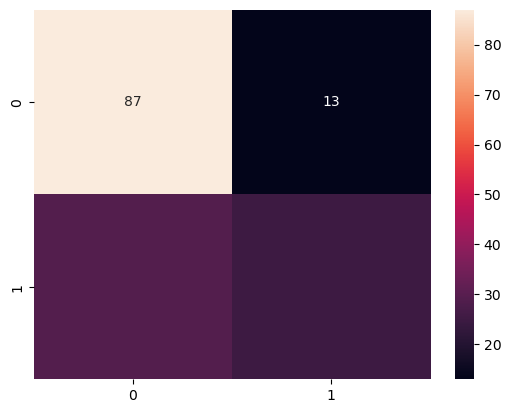

In [25]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CONFUSION MATRIX FOR [TRAIN DATA]

In [26]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

[[400   0]
 [  0 214]]


<Axes: >

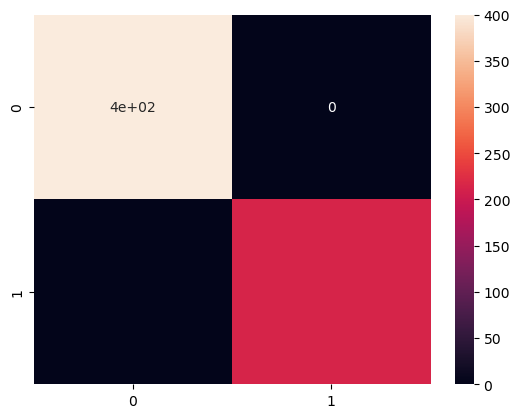

In [27]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CLASSIFICATION REPORT FOR [TRAIN DATA]

In [29]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



CLASSIFICATION REPORT FOR [TEST DATA]

In [31]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



From the above study we come to the conlusion that 100 Patients are suffered with diabetes,who scores who needs special care

*********************************************************DONE***************************************************************